# Data Challenge
## Power Laws:Forecasting Energy Consumption

### Objective
This data challenge have mainly two objectives,
- Either make a good forecast for all or some of the buildings
- Bring the conclusion that other data would be necessary to make relevant forecasts

we are provided dataset with following data,

* Historical building consumption data
* Historical weather data and weather forecast for one or a few places geographically close to the building
* Calendar information, identifying working and off days
* Meta-data about the building, e.g., whether it is an office space, a restaurant, etc.

In [1]:
# Importing the libraries
import tensorflow as tf # module for deep learning
import numpy as np # module for numerical calculations + linear algebra
import pandas as pd # module for data processing
import matplotlib.pyplot as plt # module for plotting
import datetime as dt # module for manipulating dates and times
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Data loading
data_path ='D:\Datasets\drivendata\\'

metadata = pd.read_csv(data_path+'metadata.csv')
metadata_df = pd.DataFrame(metadata)
metadata_df.head()

,SiteId,Surface,Sampling,BaseTemperature,MondayIsDayOff,TuesdayIsDayOff,WednesdayIsDayOff,ThursdayIsDayOff,FridayIsDayOff,SaturdayIsDayOff,SundayIsDayOff
0,1,1387.205119,15.0,18.0,False,False,False,False,False,True,True
1,2,6098.278376,30.0,18.0,False,False,False,False,False,True,True
2,3,10556.293605,5.0,18.0,False,False,False,False,False,True,False
3,5,12541.181277,30.0,18.0,False,False,False,False,False,True,True
4,6,9150.195373,30.0,18.0,False,False,False,False,False,True,True


In [6]:
dayoff_df.head()

,MondayIsDayOff,TuesdayIsDayOff,WednesdayIsDayOff,ThursdayIsDayOff,FridayIsDayOff,SaturdayIsDayOff,SundayIsDayOff
False,267.0,267.0,267.0,267.0,266,13,9
True,NaN,NaN,NaN,NaN,1,254,258


In [7]:
training_data = pd.read_csv(data_path+'train.csv')
train_df = pd.DataFrame(training_data)
train_df.head()

,obs_id,SiteId,Timestamp,ForecastId,Value
0,744519,1,2014-09-03 00:00:00,1,9.096555e+05
1,7627564,1,2014-09-04 00:00:00,1,1.748273e+06
2,7034705,1,2014-09-05 00:00:00,1,NaN
3,5995486,1,2014-09-06 00:00:00,1,NaN
4,7326510,1,2014-09-07 00:00:00,1,NaN


In [8]:
submission_frequency = pd.read_csv(data_path+'submission_frequency.csv')
submission_frequency_df = pd.DataFrame(submission_frequency)
submission_frequency_df.head()

,ForecastId,ForecastPeriodNS
0,1,86400000000000
1,2,86400000000000
2,3,86400000000000
3,4,86400000000000
4,5,3600000000000


Let's convert forcast period from nano secods to minutes

In [9]:
submission_frequency_df.loc[:,'ForecastPeriodNS'] /= (1000000000*60) # converting nano seconds to minutes
submission_frequency_df.head()

,ForecastId,ForecastPeriodNS
0,1,1440.0
1,2,1440.0
2,3,1440.0
3,4,1440.0
4,5,60.0


In [10]:
holiday_data = pd.read_csv(data_path+'holidays.csv')
holiday_df = pd.DataFrame(holiday_data)
holiday_df['Date'] = pd.to_datetime(holiday_df['Date'], format='%Y-%m-%d')
print(type(holiday_df['Date'][0]))
holiday_df.head()

<class 'pandas._libs.tslib.Timestamp'>


,Unnamed: 0,Date,Holiday,SiteId
0,0,2016-01-01,New year,1
1,1,2016-01-18,"Birthday of Martin Luther King, Jr.",1
2,2,2016-02-15,Washington's Birthday,1
3,3,2016-05-30,Memorial Day,1
4,4,2016-07-04,Independence Day,1


In [11]:
result_df = pd.merge(train_df, metadata_df, on='SiteId')
result_df = pd.merge(result_df, submission_frequency_df, on='ForecastId')
result_df.head()

,obs_id,SiteId,Timestamp,ForecastId,Value,Surface,Sampling,BaseTemperature,MondayIsDayOff,TuesdayIsDayOff,WednesdayIsDayOff,ThursdayIsDayOff,FridayIsDayOff,SaturdayIsDayOff,SundayIsDayOff,ForecastPeriodNS
0,744519,1,2014-09-03 00:00:00,1,9.096555e+05,1387.205119,15.0,18.0,False,False,False,False,False,True,True,1440.0
1,7627564,1,2014-09-04 00:00:00,1,1.748273e+06,1387.205119,15.0,18.0,False,False,False,False,False,True,True,1440.0
2,7034705,1,2014-09-05 00:00:00,1,NaN,1387.205119,15.0,18.0,False,False,False,False,False,True,True,1440.0
3,5995486,1,2014-09-06 00:00:00,1,NaN,1387.205119,15.0,18.0,False,False,False,False,False,True,True,1440.0
4,7326510,1,2014-09-07 00:00:00,1,NaN,1387.205119,15.0,18.0,False,False,False,False,False,True,True,1440.0


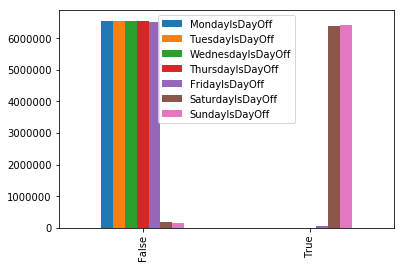

In [12]:
dayoff_df = result_df[['MondayIsDayOff', 'TuesdayIsDayOff', 'WednesdayIsDayOff', 'ThursdayIsDayOff', 'FridayIsDayOff', 'SaturdayIsDayOff', 'SundayIsDayOff']]
dayoff_df = dayoff_df.apply(pd.value_counts)
dayoff_df.head()
dayoff_df.plot.bar()

In [13]:
dayoff_df.head()

,MondayIsDayOff,TuesdayIsDayOff,WednesdayIsDayOff,ThursdayIsDayOff,FridayIsDayOff,SaturdayIsDayOff,SundayIsDayOff
False,6559830.0,6559830.0,6559830.0,6559830.0,6501990,169022,149202
True,NaN,NaN,NaN,NaN,57840,6390808,6410628


We can see that there are no any day offs for Monday, Tuesday, Wednesday and Thursday. So we can remove those columns since they are not carrying any information

In [14]:
result_df = result_df[['obs_id', 'SiteId', 'Timestamp', 'Surface', 'FridayIsDayOff', 'SaturdayIsDayOff', 'SundayIsDayOff', 'ForecastPeriodNS', 'Value']]
result_df['Timestamp'] = pd.to_datetime(result_df['Timestamp'], format='%Y-%m-%d %H:%M:%S')
result_df['IsDayOff'] = False
print(type(result_df['IsDayOff'][0]))
result_df.head()

<class 'numpy.bool_'>


,obs_id,SiteId,Timestamp,Surface,FridayIsDayOff,SaturdayIsDayOff,SundayIsDayOff,ForecastPeriodNS,Value,IsDayOff
0,744519,1,2014-09-03,1387.205119,False,True,True,1440.0,9.096555e+05,False
1,7627564,1,2014-09-04,1387.205119,False,True,True,1440.0,1.748273e+06,False
2,7034705,1,2014-09-05,1387.205119,False,True,True,1440.0,NaN,False
3,5995486,1,2014-09-06,1387.205119,False,True,True,1440.0,NaN,False
4,7326510,1,2014-09-07,1387.205119,False,True,True,1440.0,NaN,False


In [ ]:
result_df['Timestamp'][0].date()
#result_df['IsDayOff'].unique()
holiday_df['Date'][0]
holiday_df.loc[result_df['Timestamp'][0].date() == holiday_df['Date']]
lam_f = lambda row: True if (row['Timestamp'].weekday()==6 & row['SundayIsDayOff']) | (row['Timestamp'].weekday()==5 & row['SaturdayIsDayOff']) | (row['Timestamp'].weekday()==4 & row['FridayIsDayOff']) else  False
result_df['IsDayOff'] = result_df.apply(lam_f, axis = 1)
%timeit

add new colomn Rate: consumption per minute

In [ ]:
result_df['IsDayOff'].unique()
result_df.head(n=10)

In [53]:
result_df['Rate'] = result_df['Value']/result_df['ForecastPeriodNS']
result_df.head()

,obs_id,SiteId,Timestamp,Surface,FridayIsDayOff,SaturdayIsDayOff,SundayIsDayOff,ForecastPeriodNS,Value,IsDayOff,Rate
0,744519,1,2014-09-03,1387.205119,False,True,True,1440.0,9.096555e+05,False,631.705216
1,7627564,1,2014-09-04,1387.205119,False,True,True,1440.0,1.748273e+06,False,1214.078559
2,7034705,1,2014-09-05,1387.205119,False,True,True,1440.0,NaN,False,NaN
3,5995486,1,2014-09-06,1387.205119,False,True,True,1440.0,NaN,False,NaN
4,7326510,1,2014-09-07,1387.205119,False,True,True,1440.0,NaN,False,NaN


In [30]:
print(type(result_df['Timestamp'][0]))
# dt.datetime.strptime(result_df['Timestamp'][0],'%Y-%m-%d %H:%M:%S').weekday() # Monday is 0

result_df['Timestamp'][1].weekday()

<class 'pandas._libs.tslib.Timestamp'>


3

In [56]:
rate_mean = result_df['Rate'].mean()
print(rate_mean)

7235.523258727927


In [58]:
submit_data = pd.read_csv(data_path+'submission_format.csv')
submit_df = pd.DataFrame(submit_data)

submit_result_df = pd.merge(submit_df, metadata_df, on='SiteId')
submit_result_df = pd.merge(submit_result_df, submission_frequency_df, on='ForecastId')

submit_df['Value'] = rate_mean*submit_result_df['ForecastPeriodNS']
#print(submit_df.describe())
submit_df.to_csv(data_path+'submission_2.csv', index=False)
print('done')

done
